In [1]:
# data 불러오기
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdulwadood11220/netflix-customer-churn-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'netflix-customer-churn-dataset' dataset.
Path to dataset files: /kaggle/input/netflix-customer-churn-dataset


In [2]:
path += "/netflix_customer_churn.csv"

In [3]:
# csv 파일 읽기
import pandas as pd
df = pd.read_csv(path)
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [4]:
# 필요없는 컬럼제거: customer_id
df = df.drop(columns=['customer_id'], axis=1)
df

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,19,Female,Basic,49.17,11,Europe,Desktop,8.99,0,Credit Card,4,4.10,Drama
4996,67,Female,Basic,9.24,2,North America,Desktop,8.99,0,PayPal,3,3.08,Documentary
4997,66,Male,Standard,16.55,49,South America,Desktop,13.99,1,Debit Card,2,0.33,Action
4998,59,Female,Basic,9.12,3,Europe,Laptop,8.99,0,Credit Card,4,2.28,Sci-Fi


In [5]:
# target과 나머지 features로 분류
target = df['churned']
features = df.drop(columns=['churned'], axis=1)
features.shape

(5000, 12)

In [6]:
# target과 features에 대해서 train_test_split 진행
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 12), (1000, 12), (4000,), (1000,))

In [7]:
# X_train과 y_train merge
train_df = pd.concat([X_train, y_train], axis=1)
train_df

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,churned
4227,54,Other,Premium,9.80,56,North America,Tablet,17.99,Crypto,4,0.17,Romance,1
4676,31,Other,Basic,10.38,42,North America,Tablet,8.99,Debit Card,1,0.24,Action,1
800,59,Other,Basic,20.13,6,Africa,Mobile,8.99,Credit Card,1,2.88,Drama,0
3671,45,Female,Basic,9.77,16,Asia,Laptop,8.99,Gift Card,2,0.57,Romance,0
4193,36,Male,Standard,9.10,2,North America,Tablet,13.99,Debit Card,2,3.03,Drama,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,41,Other,Standard,1.20,49,Africa,Laptop,13.99,Credit Card,4,0.02,Romance,1
466,32,Other,Premium,24.87,41,North America,Tablet,17.99,Gift Card,5,0.59,Sci-Fi,0
3092,18,Other,Standard,3.54,45,Oceania,Mobile,13.99,Debit Card,5,0.08,Horror,1
3772,50,Male,Premium,7.96,51,Oceania,Tablet,17.99,Gift Card,5,0.15,Horror,1


In [8]:
# watch_hours feature생성
def watch_hours_feature(data):
  if data['watch_hours'] < 5:
    return "under 5"
  elif data['watch_hours'] < 10:
    return "5 ~ under 10"
  elif data['watch_hours'] < 20:
    return "10 ~ under 20"
  else:
    return "over 20"

In [9]:
train_df['watch_hours_feature'] = train_df.apply(watch_hours_feature, axis=1)
train_df

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,churned,watch_hours_feature
4227,54,Other,Premium,9.80,56,North America,Tablet,17.99,Crypto,4,0.17,Romance,1,5 ~ under 10
4676,31,Other,Basic,10.38,42,North America,Tablet,8.99,Debit Card,1,0.24,Action,1,10 ~ under 20
800,59,Other,Basic,20.13,6,Africa,Mobile,8.99,Credit Card,1,2.88,Drama,0,over 20
3671,45,Female,Basic,9.77,16,Asia,Laptop,8.99,Gift Card,2,0.57,Romance,0,5 ~ under 10
4193,36,Male,Standard,9.10,2,North America,Tablet,13.99,Debit Card,2,3.03,Drama,0,5 ~ under 10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,41,Other,Standard,1.20,49,Africa,Laptop,13.99,Credit Card,4,0.02,Romance,1,under 5
466,32,Other,Premium,24.87,41,North America,Tablet,17.99,Gift Card,5,0.59,Sci-Fi,0,over 20
3092,18,Other,Standard,3.54,45,Oceania,Mobile,13.99,Debit Card,5,0.08,Horror,1,under 5
3772,50,Male,Premium,7.96,51,Oceania,Tablet,17.99,Gift Card,5,0.15,Horror,1,5 ~ under 10


<Axes: xlabel='watch_hours_feature', ylabel='churned'>

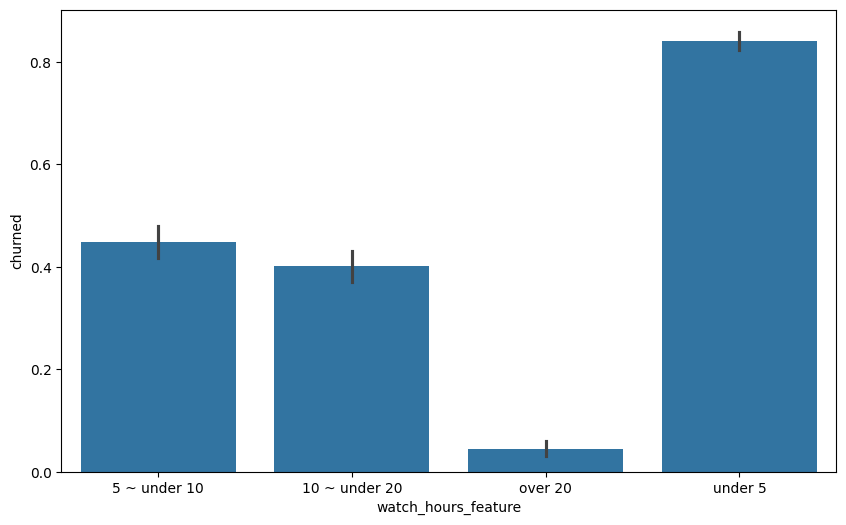

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='watch_hours_feature', y='churned', data=train_df)

In [11]:
# last_login_days feature 생성
def last_login_days_feature(data):
  if data['last_login_days'] < 3:
    return "under 3"
  elif data['last_login_days'] < 14:
    return "3 ~ under 14"
  elif data['last_login_days'] < 30:
    return "14 ~ under 30"
  else:
    return "over 30"

In [12]:
train_df['last_login_days_feature'] = train_df.apply(last_login_days_feature, axis=1)
train_df

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,churned,watch_hours_feature,last_login_days_feature
4227,54,Other,Premium,9.80,56,North America,Tablet,17.99,Crypto,4,0.17,Romance,1,5 ~ under 10,over 30
4676,31,Other,Basic,10.38,42,North America,Tablet,8.99,Debit Card,1,0.24,Action,1,10 ~ under 20,over 30
800,59,Other,Basic,20.13,6,Africa,Mobile,8.99,Credit Card,1,2.88,Drama,0,over 20,3 ~ under 14
3671,45,Female,Basic,9.77,16,Asia,Laptop,8.99,Gift Card,2,0.57,Romance,0,5 ~ under 10,14 ~ under 30
4193,36,Male,Standard,9.10,2,North America,Tablet,13.99,Debit Card,2,3.03,Drama,0,5 ~ under 10,under 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,41,Other,Standard,1.20,49,Africa,Laptop,13.99,Credit Card,4,0.02,Romance,1,under 5,over 30
466,32,Other,Premium,24.87,41,North America,Tablet,17.99,Gift Card,5,0.59,Sci-Fi,0,over 20,over 30
3092,18,Other,Standard,3.54,45,Oceania,Mobile,13.99,Debit Card,5,0.08,Horror,1,under 5,over 30
3772,50,Male,Premium,7.96,51,Oceania,Tablet,17.99,Gift Card,5,0.15,Horror,1,5 ~ under 10,over 30


<Axes: xlabel='last_login_days_feature', ylabel='churned'>

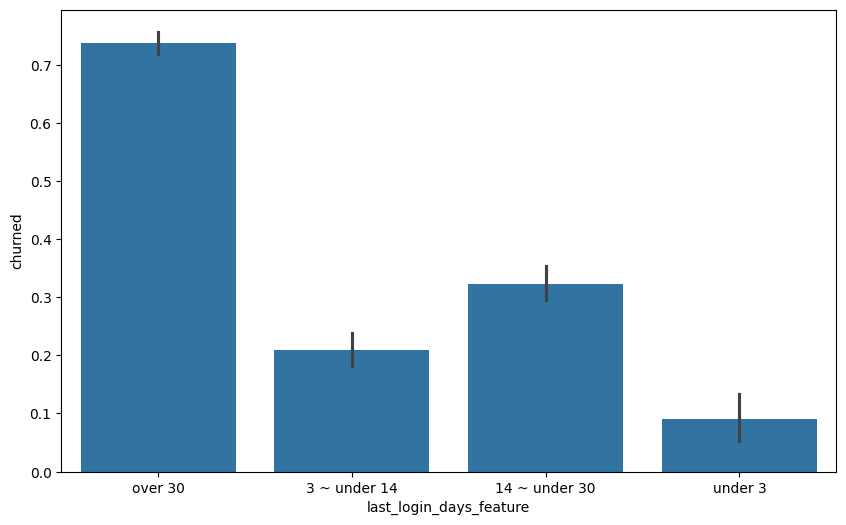

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='last_login_days_feature', y='churned', data=train_df)

In [14]:
# monthly_fee feature생성
def monthly_fee_feature(data):
  if data['monthly_fee'] < 5:
    return "under 5"
  elif data['monthly_fee'] > 15:
    return "over 15"
  else:
    return "5 ~ 15"

train_df['monthly_fee_feature'] = train_df.apply(monthly_fee_feature, axis=1)
train_df

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,churned,watch_hours_feature,last_login_days_feature,monthly_fee_feature
4227,54,Other,Premium,9.80,56,North America,Tablet,17.99,Crypto,4,0.17,Romance,1,5 ~ under 10,over 30,over 15
4676,31,Other,Basic,10.38,42,North America,Tablet,8.99,Debit Card,1,0.24,Action,1,10 ~ under 20,over 30,5 ~ 15
800,59,Other,Basic,20.13,6,Africa,Mobile,8.99,Credit Card,1,2.88,Drama,0,over 20,3 ~ under 14,5 ~ 15
3671,45,Female,Basic,9.77,16,Asia,Laptop,8.99,Gift Card,2,0.57,Romance,0,5 ~ under 10,14 ~ under 30,5 ~ 15
4193,36,Male,Standard,9.10,2,North America,Tablet,13.99,Debit Card,2,3.03,Drama,0,5 ~ under 10,under 3,5 ~ 15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,41,Other,Standard,1.20,49,Africa,Laptop,13.99,Credit Card,4,0.02,Romance,1,under 5,over 30,5 ~ 15
466,32,Other,Premium,24.87,41,North America,Tablet,17.99,Gift Card,5,0.59,Sci-Fi,0,over 20,over 30,over 15
3092,18,Other,Standard,3.54,45,Oceania,Mobile,13.99,Debit Card,5,0.08,Horror,1,under 5,over 30,5 ~ 15
3772,50,Male,Premium,7.96,51,Oceania,Tablet,17.99,Gift Card,5,0.15,Horror,1,5 ~ under 10,over 30,over 15


<Axes: xlabel='monthly_fee_feature', ylabel='churned'>

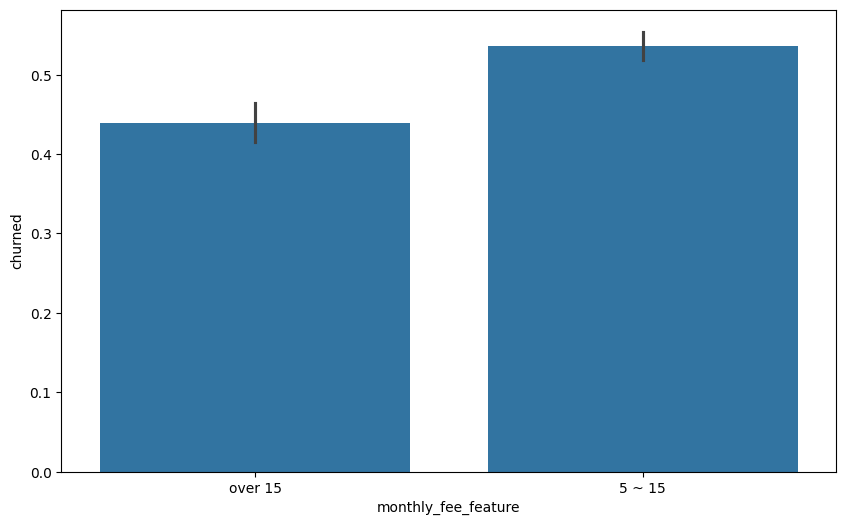

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='monthly_fee_feature', y='churned', data=train_df)

In [16]:
# number_of_profiles feature생성
def number_of_profiles_feature(data):
  if data['number_of_profiles'] == 1:
    return "1"
  elif data['number_of_profiles'] >= 4:
    return "4 and over"
  else:
    return "2 or 3"

train_df['number_of_profiles_feature'] = train_df.apply(number_of_profiles_feature, axis=1)
train_df

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,churned,watch_hours_feature,last_login_days_feature,monthly_fee_feature,number_of_profiles_feature
4227,54,Other,Premium,9.80,56,North America,Tablet,17.99,Crypto,4,0.17,Romance,1,5 ~ under 10,over 30,over 15,4 and over
4676,31,Other,Basic,10.38,42,North America,Tablet,8.99,Debit Card,1,0.24,Action,1,10 ~ under 20,over 30,5 ~ 15,1
800,59,Other,Basic,20.13,6,Africa,Mobile,8.99,Credit Card,1,2.88,Drama,0,over 20,3 ~ under 14,5 ~ 15,1
3671,45,Female,Basic,9.77,16,Asia,Laptop,8.99,Gift Card,2,0.57,Romance,0,5 ~ under 10,14 ~ under 30,5 ~ 15,2 or 3
4193,36,Male,Standard,9.10,2,North America,Tablet,13.99,Debit Card,2,3.03,Drama,0,5 ~ under 10,under 3,5 ~ 15,2 or 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,41,Other,Standard,1.20,49,Africa,Laptop,13.99,Credit Card,4,0.02,Romance,1,under 5,over 30,5 ~ 15,4 and over
466,32,Other,Premium,24.87,41,North America,Tablet,17.99,Gift Card,5,0.59,Sci-Fi,0,over 20,over 30,over 15,4 and over
3092,18,Other,Standard,3.54,45,Oceania,Mobile,13.99,Debit Card,5,0.08,Horror,1,under 5,over 30,5 ~ 15,4 and over
3772,50,Male,Premium,7.96,51,Oceania,Tablet,17.99,Gift Card,5,0.15,Horror,1,5 ~ under 10,over 30,over 15,4 and over


<Axes: xlabel='number_of_profiles_feature', ylabel='churned'>

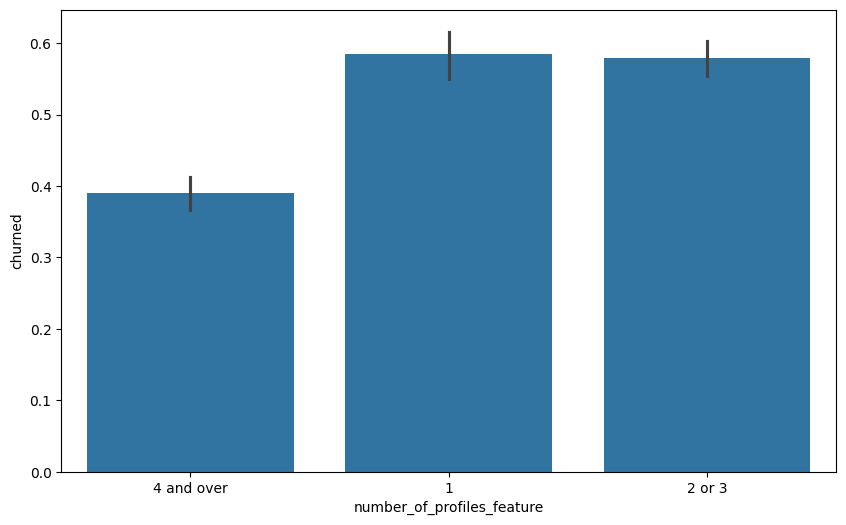

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='number_of_profiles_feature', y='churned', data=train_df)